In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

%matplotlib inline
plt.style.use('seaborn')

# Manny Pagan
# Python 9/24 Course Final Project

# Mental Health in Tech

# Hypothesis
The survey responses convey self reported mental health status and information on the employer's support for mental health in the tech field.
The dataset I used is data from 2014. I wanted to know where the most US responses are located. My hypothesis is that they are from states considered the biggest tech hubs.
<img src="brain.jpg">

# My research shows that the largest tech hubs in the US based on the share of software job postings for each respective metro area:
    1. San Jose-Sunnyvale-Santa Clara, California
    2. Huntsville, Alabama
    3. Seattle-Tacoma-Bellevue, Washington
    4. California-Lexington Park, Maryland
    5. Durham-Chapel Hill, North Carolina
    6. Raleigh, North Carolina
    7. Washington, D.C., Arlington-Alexandria, Virginia, Maryland
    8. Boulder, Colorado
    9. San Francisco-Oakland-Hayward, California
    10. Austin-Round Rock, Texas
    
Source: https://www.marketwatch.com/story/the-10-best-cities-for-tech-jobs-2017-10-26


In [39]:
mh_df = pd.read_csv('survey.csv')

In [40]:
mh_df.head(100)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


# Below are the top 10 states based on respondents:

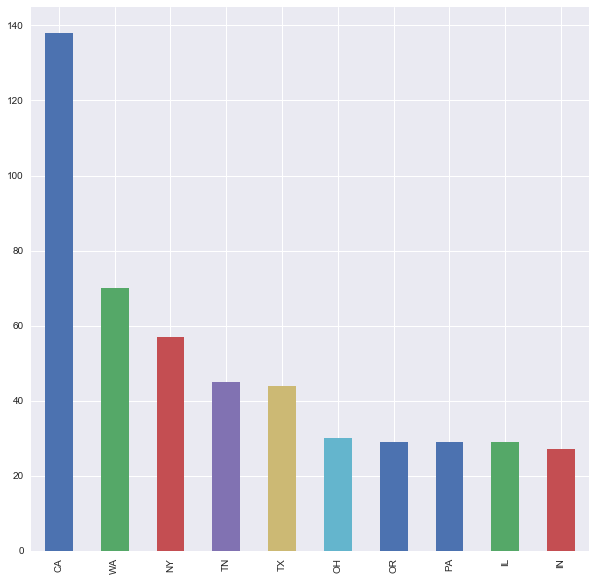

In [41]:
states = mh_df['state'].value_counts()

states_t_10 = states.head(10)
states_t_10.plot(kind='bar', figsize=(10,10))

# Below are the bottom 10 states based on respondents:

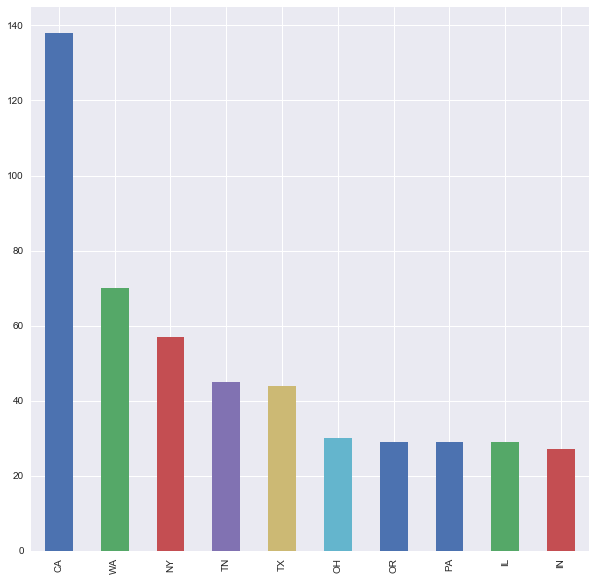

In [42]:
states_b_10 = states.head(10)
states_b_10.plot(kind='bar', figsize=(10,10))

# I had to clean some data from the dataset... Age and Gender appeared to be entered manually with inconsistencies

In [43]:
def gender_scrub(value):
    if value == "m":
        return 'M'
    elif value == 'f':
        return 'F'
    elif value == 'male':
        return 'M'
    elif value ==' female':
        return 'F'
    elif value == 'Male':
        return 'M'
    elif value == 'Female':
        return 'F'
    else:
        return 'Other'
    
def age_scrub(value):
    if value < 18:
        return 'Null'
    elif value > 100:
        return 'Null'
    else:
        return value
    
mh_df['Gender_scrubbed'] = mh_df['Gender'].apply(gender_scrub)
mh_df['Age_scrubbed'] = mh_df['Age'].apply(age_scrub)

Breakdown of respondents by gender...

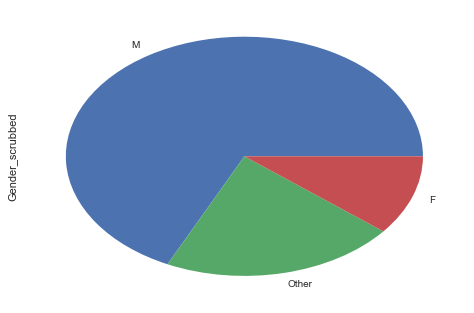

In [53]:
mh_df['Gender_scrubbed'].value_counts().plot(kind='pie')

# Ages sampled in the survey...

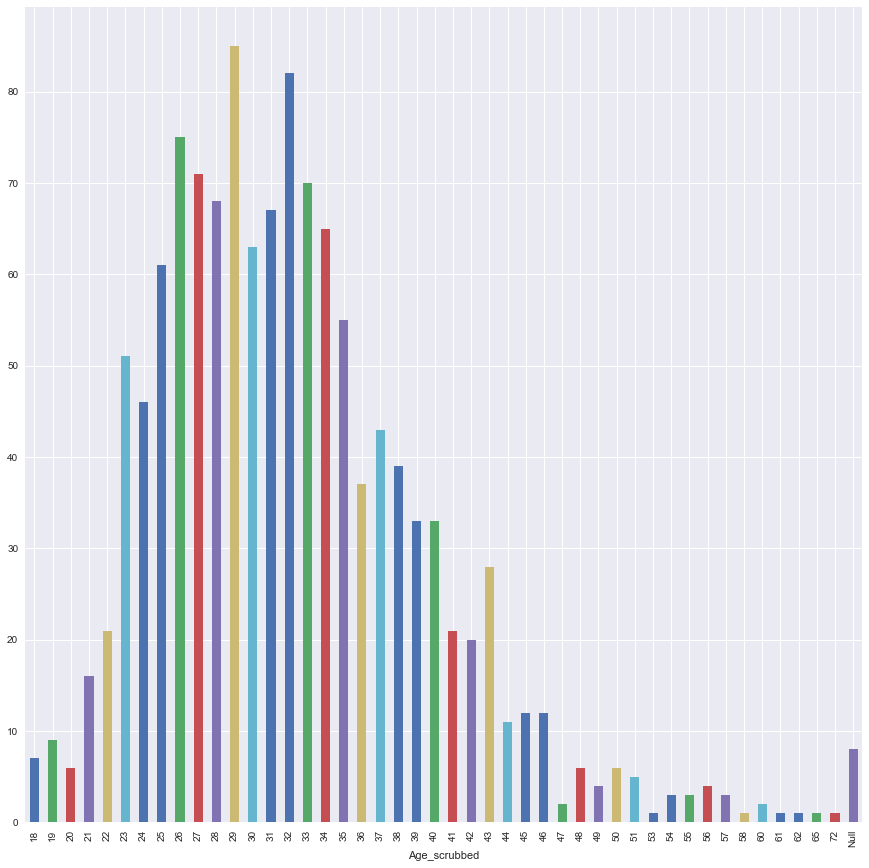

In [45]:
mh_df.groupby('Age_scrubbed')['Gender_scrubbed'].count().plot(kind='bar', figsize=(15,15))

# Source countries of the dataset

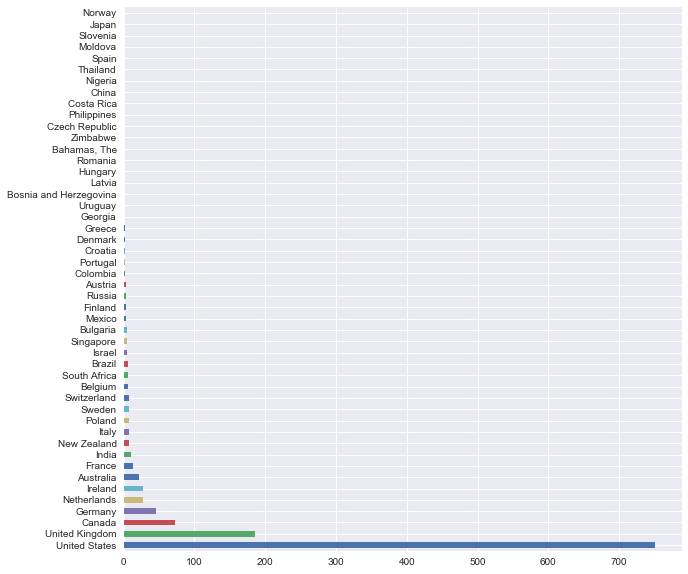

In [46]:
mh_df['Country'].value_counts().plot(kind='barh', figsize=(10,10))

Breakdown on whether respondents feel their condition interferes with their work

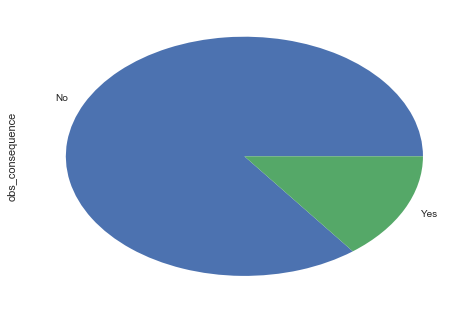

In [47]:
mh_df['obs_consequence'].value_counts().plot(kind='pie')

Breakdown on whether respondents have observed consequences in their workplace

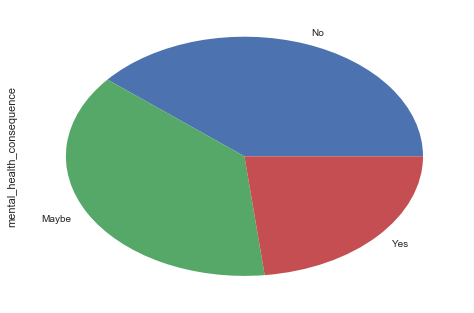

In [48]:
mh_df['mental_health_consequence'].value_counts().plot(kind='pie')

# Conclusion

My conclusion is a bit inconclusive...
- California, Maryland and North Carolina are represented on the top 10 tech hubs more than once, but both MD and NC are not in the top 10 of the dataset

In [49]:
# There is a lot of data to crunch on this dataset

Some relationships worth exploring:
    - relationship between remote work and gender on the survey responses regarding mental health
    - the size of the company and whether the employer provides mental health services or wellness programs
    - how easy it would be to request medical leave based on the state
    - if a person's anonymity is protected and how that affects responses
    - if the proportion of Male:Female in the survey arrurately reflect the tech industry workforce
    - the relationship between age and responses

# <img src="amazing.jpg">